In [28]:
%%capture
'''
(C) Copyright 2020-2025 Murilo Marques Marinho (murilomarinho@ieee.org)

     This file is licensed in the terms of the
     Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)
     license.

 Derivative work of:
 https://github.com/dqrobotics/learning-dqrobotics-in-matlab/tree/master/robotic_manipulators
 Contributors to this file:
     Murilo Marques Marinho (murilomarinho@ieee.org)
'''

# DQ4 Dual Quaternion Basics using DQ Robotics - Part 2

## I found an issue
Thank you! Please report it at https://github.com/MarinhoLab/OpenExecutableBooksRobotics/issues

## Introduction

The last lesson introduced dual quaternions, some basic dual quaternion operations; and, most importantly, unit dual quaternions and their ability to represent rigid body motion.


As always, before we start, make essential installations and imports.


In [ ]:
%%capture
%pip install dqrobotics dqrobotics-pyplot
%pip install dqrobotics dqrobotics-pyplot --break-system-packages

In [30]:
from dqrobotics import *
from dqrobotics_extensions.pyplot import plot
import matplotlib.pyplot as plt
from math import pi, sin, cos, sqrt

## Notation

In the last lesson, we learned that unit dual quaternions represent reference frames and pose transformations. In this lesson, we will see that dual quaternions can also represent points, lines, and planes.

Keep these in mind (we will also use this notation when writing papers to conferences and journals):

-  $h\in \mathbb{H}$: a quaternion. (Bold-face, lowercase character)
-  $\underline{h} \in \mathcal{H}$: a dual quaternion. (Bold-face, underlined, lowercase character)
-  $p,t,\cdots \in {\mathbb{H}}_p$: pure quaternions. They represent points, positions, and translations. They are quaternions for which $\textrm{Re}\left(h\right)=0$.
-  $r\in {\mathbb{S}}^3$: unit quaternions. They represent orientations and rotations. They are quaternions for which $||h||=1$.
-  $\underline{x} \in$ $\underline{\mathcal{S}}$: unit dual quaternions. They represent poses and pose transformations. They are dual quaternions for which $||h||=1$.

## What we have seen so far

### Points, positions, and translations

A pure quaternion, such as $\mathit{\mathbf{p}},\mathit{\mathbf{t}}\in$ ${\mathbb{H}}_p$, can be used to represent points, positions, and translations. Pure quaternions can always be written in the form

$$\mathit{\mathbf{t}}=x\hat{\imath \;} +y\hat{\jmath \;} +z\hat{k} ,$$

where $x,y,z\in$ $\mathbb{R}$ represent the 3D coordinates.

### Orientations and rotations

A unit quaternion, $\mathit{\mathbf{r}}\in$ ${\mathbb{S}}^3$, can always be written in the form

$$\mathit{\mathbf{r}}=\cos \left(\frac{\phi \;}{2}\right)+\mathit{\mathbf{v}}\;\sin \left(\frac{\phi \;}{2}\right), $$

where $\phi \in$ $\mathbb{R}$ represents the rotation angle and $\mathit{\mathbf{v}}\in$ ${\mathbb{H}}_p$ represents the rotation axis.

### Reference frames and pose transformations

A unit dual quaternion, $\underline{\mathit{\mathbf{x}}}$ $\in$ $\underline{{\mathcal{S}}}$ , can always be written in the form

$$\underline{\mathit{\mathbf{x}}} =\mathit{\mathbf{r}}+\varepsilon \frac{\;1}{2}\mathit{\mathbf{t}}\;\mathit{\mathbf{r}},$$

where $\mathit{\mathbf{r}}\in$ ${\mathbb{S}}^3$ is the unit-norm quaternion representing the rotation; and $t$ $\in {\mathbb{H}}_p$ is the quaternion representing the translation.

## Lines and planes

Unit dual quaternions, besides being used to represent rotations and translations, can also be used to represent lines and planes in 3D space. These geometric primitives are invaluable in many robot control scenarios.

### Plücker Lines
<p style="text-align:left">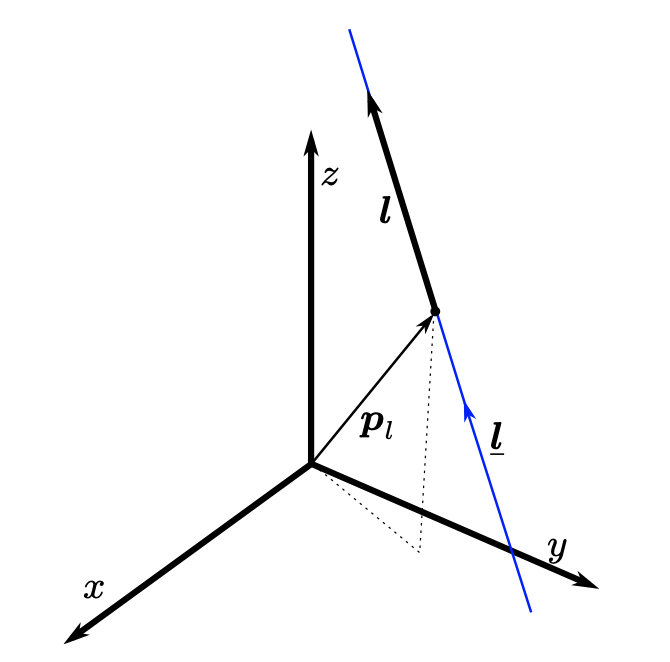</p>


In high school, you have been introduced to the line equation in 3D space using linear algebra. Using the concept of unit dual quaternions, we can also represent lines in the form


$$\underline{\mathit{\mathbf{l}}} =\mathit{\mathbf{l}}+\varepsilon \mathit{\mathbf{m}},$$

where $\mathit{\mathbf{l}}\in$ ${\mathbb{H}}_p \cap {\mathbb{S}}^3$ is a unit vector representing the line's direction and $\mathit{\mathbf{m}}\in$ ${\mathbb{H}}_p$ is called the line's moment. The moment is defined as $\mathit{\mathbf{m}}$ $\triangleq$ ${\mathit{\mathbf{p}}}_l \times \mathit{\mathbf{l}}$ , in which ${\mathit{\mathbf{p}}}_l \in$ ${\mathbb{H}}_p$ is a point (any point) in the line. A line represented this way is called a Plücker line. Note that a Plücker line is a pure dual quaternion with unit norm, that is $\underline{l} \in {\mathcal{H}}_p \cap \underline{S}$.

<a name="H_A6378751"></a>
#### Pure quaternion cross product

Note that $\times$ is the cross-product between pure quaternions, and is defined as


$${\mathit{\mathbf{h}}}_1 \times {\mathit{\mathbf{h}}}_2 =\frac{\;{\mathit{\mathbf{h}}}_1 {\mathit{\mathbf{h}}}_2 -{\mathit{\mathbf{h}}}_2 {\mathit{\mathbf{h}}}_1 }{2}$$

for any ${\mathit{\mathbf{h}}}_1, {\mathit{\mathbf{h}}}_2 \in$ ${\mathbb{H}}_p$. Note that this operation is equivalent to the cross-product between vectors in ${\mathbb{R}}^3$.

<a name="H_A8739BB6"></a>
#### Plücker line example

Suppose that we want the Plücker line that represents the x-axis. The direction of the line will be


$${\mathit{\mathbf{l}}}_1 =\hat{\imath \;}$$

In [31]:
l1=i_
print(f"l1 = {l1}")

l1 = 1i



and a point in the line is

$${\mathit{\mathbf{p}}}_{l,1} =0\hat{\imath \;} +0\hat{\jmath \;} +0\hat{k} =0.$$


In [32]:
p_l1 = DQ([0]) # We use the DQ() constructor so that Python knows its a DQ, not a real number.
print(f"p_l1 = {p_l1}")

p_l1 = 0



because the line crosses the origin. Hence, the moment of the line will be given by


$${\mathit{\mathbf{m}}}_1 ={\mathit{\mathbf{p}}}_{l,1} \times {\mathit{\mathbf{l}}}_1.$$

In [33]:
m1 = cross(p_l1,l1)
print(f"m1 = {m1}")

m1 = 0



Hence, the Plücker line representing the origin will be


$${\underline{\mathit{\mathbf{l}}} }_1 ={\mathit{\mathbf{l}}}_1 +\varepsilon {\mathit{\mathbf{m}}}_1 =\hat{\imath \;} \ldotp$$

In [34]:
l1_dq = l1 + E_*m1
print(f"l1_dq = {l1_dq}")

l1_dq = 1i


<a name="H_330BB9FB"></a>
#### Checking if a dual quaternion is a line using DQ Robotics

Let us check that the Plücker line we calculated is a pure dual quaternion with unit norm. The following two conditions have to hold simultaneously.


In [35]:
is_pure(l1_dq)

True

In [36]:
is_unit(l1_dq)

True


You can also test directly if those two conditions hold simultaneously with


In [37]:
is_line(l1_dq)

True

<a name="H_3730AC58"></a>
#### Plotting lines using DQ Robotics

When you plot lines using DQ Robotics you have to specify that you want to plot that unit dual quaternion as a line. For example


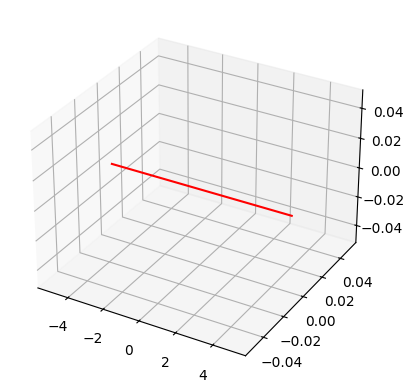

In [38]:
plt.figure()
ax = plt.axes(projection='3d')
plot(l1_dq,line=True,scale=5)
plt.show()


 ***Note that a Plücker line is, well, a line (not a line segment). This means that, mathematically, its length is infinite. When plotting, you have to choose how much of the line you want to show on screen. In this example, we are showing 5 meters only.***

### Planes

<p style="text-align:left">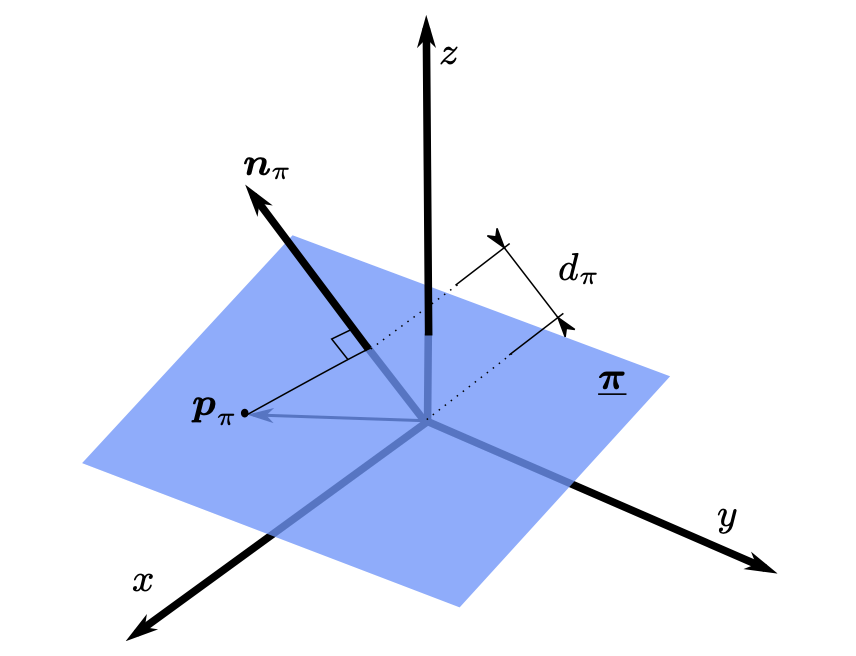</p>

Also in high-school-level linear-algebra, you have been introduced to the equation of the plane. Unit dual quaternions can also be used to represent planes, in the form


$$\underline{\pi} ={\mathit{\mathbf{n}}}_{\pi \;} +\varepsilon d_{\pi \;} ,$$

where ${\mathit{\mathbf{n}}}_{\pi \;} \in$ ${\mathbb{H}}_p \cap {\mathbb{S}}^3$ is the unit vector representing the plane's normal. In addition, $d_{\pi \;} \in$ $\mathbb{R}$ is the signed distance to the plane (with respect to the normal centered at the origin), that can be written as


$$d_{\pi \;} =\;<{\mathit{\mathbf{p}}}_{\pi \;} ,{\mathit{\mathbf{n}}}_{\pi \;} >$$

in which ${\mathit{\mathbf{p}}}_{\pi \;\;} \in$ ${\mathbb{H}}_p$ is any point in the plane.

#### Pure quaternion inner product

Note that $<,>$ is the inner product between pure quaternions, and is defined as

$$<{\mathit{\mathbf{h}}}_{1,} {\mathit{\mathbf{h}}}_2 >=-\frac{\;{\mathit{\mathbf{h}}}_1 {\mathit{\mathbf{h}}}_2 +{\mathit{\mathbf{h}}}_2 {\mathit{\mathbf{h}}}_1 }{2}$$

for any ${\mathit{\mathbf{h}}}_1 ,{\mathit{\mathbf{h}}}_2 \in$ ${\mathbb{H}}_p$ .

#### Plane example

Suppose that we want one of the unit dual quaternions that represent the x-y plane. One of the normals to the x-y plane (there are two) is given by

$${\mathit{\mathbf{n}}}_{\pi ,1} =\hat{k}.$$

In [39]:
n_pi1 = k_
print(f"n_pi1 = {n_pi1}")

n_pi1 = 1k


<a name="H_0C4362E9"></a>

One of the points in the x-y plane is the origin, so we can use


$${\mathit{\mathbf{p}}}_{\pi ,1} =0$$

In [40]:
p_pi1 = DQ([0])  # We use the DQ() constructor so that Python knows its a DQ, not a real number.
print(f"p_pi1 = {p_pi1}")

p_pi1 = 0



Hence, the distance can be calculated as


$$d_{\pi ,1} =\;<{\mathit{\mathbf{p}}}_{\pi ,1} ,{\mathit{\mathbf{n}}}_{\pi ,1} >\;=0$$

In [41]:
d_pi1 = dot(p_pi1, n_pi1)
print(f"d_pi1 = {d_pi1}")

d_pi1 = 0



Therefore, the x-y plane can be represented by the unit dual quaternion


$${\underline{\pi} }_1 ={\mathit{\mathbf{n}}}_{\pi ,1} +\varepsilon d_{\pi ,1} =\hat{k} \ldotp$$

In [42]:
pi1 = n_pi1 + E_*d_pi1
print(f"pi1 = {pi1}")

pi1 = 1k


<a name="H_2E760C0A"></a>
#### Checking if a dual quaternion is a plane using DQ Robotics
<a name="H_5A5623E0"></a>

We can check if a unit dual quaternion represents a plane if all the following conditions hold simultaneously.


In [43]:
is_unit(pi1)

True

In [44]:
is_pure(P(pi1))

True

In [45]:
is_real(D(pi1))

True

<a name="H_3B80197F"></a>

This can be done directly with one command


In [46]:
is_plane(pi1)

True

<a name="H_8F648B93"></a>
#### Plotting planes using DQ Robotics

When you plot planes using DQ Robotics, you have to specify that you want to plot that unit dual quaternion as a plane. For example


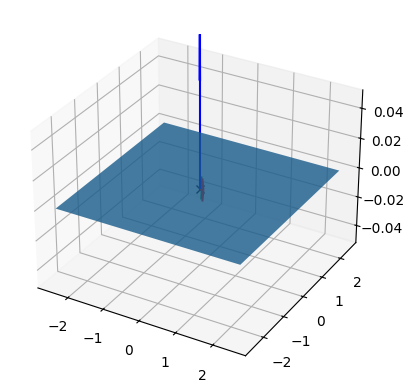

In [47]:
plt.figure()
ax = plt.axes(projection='3d')
plot(pi1,plane=True,scale=5)
plt.show()

<a name="T_EBE37F7D"></a>

 ***Note that a plane line is, mathematically, infinite. When plotting, you have specify its size, in this case 5, and a central location, in this case*** ${\mathit{\mathbf{p}}}_{\pi ,1}$ ***.***

<a name="H_100046E6"></a>
## (Signed) distances
<a name="H_1DB1F7A9"></a>

One important measure for controlling robotic systems is the measurement of distance. The distance is always a real number. In some contexts it might be signed. We will discuss some of those cases.

<a name="H_9D8F7CC4"></a>
### Point to point distance
<a name="H_08C30C80"></a>

The distance between two points is the most basic form of distance. Given ${\mathit{\mathbf{p}}}_1 ,{\mathit{\mathbf{p}}}_2 \in$ ${\mathbb{H}}_p$ , the distance between them is given by


$$d_{p_1 ,p_2 } =\left|\right|{\mathit{\mathbf{p}}}_1 -{\mathit{\mathbf{p}}}_2 \left|\right|$$

For example, using DQ Robotics, this can be calculated as,


In [48]:
p1 = i_+j_
p2 = k_
d_p1_p2 = norm(p1-p2)
print(f"d_p1_p2 = {d_p1_p2}")

d_p1_p2 = 1.732051


<a name="H_27F498EB"></a>
### Point to line distance

The distance between any point $\mathit{\mathbf{p}}\in$ ${\mathbb{H}}_p$ and a line ${\underline{l} }_1 \in {\mathcal{H}}_p \cap \underline{S}$ is


$$d_{p,l_1 } =\left|\right|\mathit{\mathbf{p}}\times {\mathit{\mathbf{l}}}_1 -{\mathit{\mathbf{m}}}_1 \left|\right|.$$

For example, using DQ Robotics, this can be calculated as


In [49]:
# Point coordinates
p = i_+j_
# Build the line
l1 = k_
m1 = cross(i_,k_)
l1_dq = l1 + E_*m1
# Calculate distance
d_p_l1 = norm(cross(p,l1)-m1)

print(f"d_p_l1 = {d_p_l1}")

d_p_l1 = 1



The distance can also be calculated in using a dedicated function inside DQ_Geometry.


In [50]:
from dqrobotics.utils import DQ_Geometry

d_p_l1 = sqrt(DQ_Geometry.point_to_line_squared_distance(p,l1_dq))

print(f"d_p_l1 = {d_p_l1}")

d_p_l1 = 1.0



***Note: when controlling robots, it is usually more convenient to use the squared norm instead of the norm.***

<a name="H_9E556AA8"></a>
### Point to plane signed distance
<a name="H_31D31358"></a>

The (signed) distance between a point $\mathit{\mathbf{p}}\in$ ${\mathbb{H}}_p$ and a plane ${\underline{\pi} }_1$ , with respect to the plane, is


$$d_{p,\pi {\;}_1 } =\;<\mathit{\mathbf{p}},{\mathit{\mathbf{n}}}_{\pi \;,1} >-d_{\pi \;,1} \ldotp$$

Note that the sign of the distance indicates if the point is "above" the plane or "below" the plane.


For example, using DQ Robotics, this can be calculated as,


In [51]:
# Point coordinates
p = k_
# Build the plane
n_pi1 = k_
p_pi1 = DQ([0])
d_pi1 = dot(p_pi1,n_pi1)
pi1 = n_pi1 + E_*d_pi1
# Calculate distance
d_p_pi1 = dot(p,n_pi1)-d_pi1

print(f"d_p_pi1 = {d_p_pi1}")

d_p_pi1 = 1



This distance can also be calculated with


In [52]:
from dqrobotics.utils import DQ_Geometry

d_p_pi1 = DQ_Geometry.point_to_plane_distance(p,pi1)

print(f"d_p_pi1 = {d_p_pi1}")

d_p_pi1 = 1.0


<a name="H_DA013E47"></a>
### Line to line distance

Calculating the distance between two lines, ${\underline{l} }_1 ,{\underline{l} }_2 \in {\mathcal{H}}_p \cap \underline{S}$ is somewhat more complicated than the ones mentioned above so we will skip the details for now. You can check the following paper for details:


[**Dynamic Active Constraints for Surgical Robots using Vector Field Inequalities.**](https://arxiv.org/pdf/1804.11270.pdf) Marinho, M. M; Adorno, B. V; Harada, K.; and Mitsuishi, M. *IEEE Transactions on Robotics (T-RO)*, 35(5): 1166–1185. October 2019.


For now, it suffices to know that the distance between two lines can be obtained, using DQ Robotics, as follows


In [53]:
from dqrobotics.utils import DQ_Geometry

# Build l1_dq
l1 = k_
p_l1 = DQ([0])
m1 = cross(p_l1,k_)
l1_dq = l1 + E_*m1
# Build l2_dq
l2 = k_
p_l2 = i_
m2 = cross(p_l2,k_)
l2_dq = l2 + E_*m2
# Get the distance
d_l1_l2 = sqrt(DQ_Geometry.line_to_line_squared_distance(l1_dq,l2_dq))

print(f"d_l1_l2 = {d_l1_l2}")

d_l1_l2 = 1.0


# Homework


In [54]:
## Homework example
# Essential imports
from dqrobotics import *
from dqrobotics.utils import DQ_Geometry
from math import pi, sin, cos 

## Solutions
# Question 1

# Question 2

# Question 3



Following the template above to create a script called `dual_quaternion_basics_part2_homework.py`, do the following.

1.  Find the Plücker line representing the y-axis using four different ${\mathit{\mathbf{p}}}_l$ and store them in ${\underline{\mathit{\mathbf{l}}} }_1, {\underline{\mathit{\mathbf{l}}} }_2 ,{\underline{\mathit{\mathbf{l}}} }_3, \textrm{and}\;{\underline{\mathit{\mathbf{l}}} }_4$. Are all Plücker lines the same?
2. Define the point ${\mathit{\mathbf{p}}}_1 =2\hat{\imath \;} +\hat{\jmath \;} +\hat{k}$ and calculate its distance to ${\underline{\mathit{\mathbf{l}}} }_1$.
3. Find the y-z plane using the two possible plane normals, ${\mathit{\mathbf{n}}}_{\pi }$, and store them in ${\underline{\pi} }_1$ and ${\underline{\pi} }_2$.
4. Calculate the distance between ${\mathit{\mathbf{p}}}_1$ and ${\underline{\pi} }_1$, and between ${\mathit{\mathbf{p}}}_1$ and ${\underline{\pi} }_2$. Are the signs different? Why?
5. Build a 5mx5mx5m cubic region centered in the origin delineated by six planes. Call them ${\underline{\pi} }_3$, ${\underline{\pi} }_4$, ${\underline{\pi} }_5$, ${\underline{\pi} }_6$, ${\underline{\pi} }_7$, ${\underline{\pi} }_8$ . Make sure that all normals point towards the origin. Plot this cubic region.
6. Among ${\underline{\pi} }_3$ , ${\underline{\pi} }_4$ , ${\underline{\pi} }_5$ , ${\underline{\pi} }_6$ , ${\underline{\pi} }_7$ , ${\underline{\pi} }_8$ , which one is the plane closest to ${\mathit{\mathbf{p}}}_1$ ? What is the distance between ${\mathit{\mathbf{p}}}_1$ and the closest plane?
